In [3]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

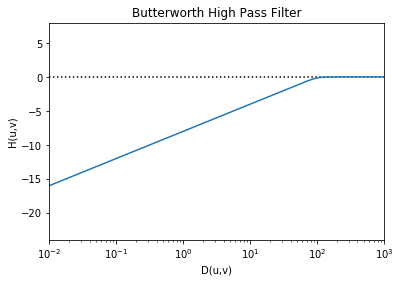

In [60]:
from scipy import signal
b, a = signal.butter(4, 100, 'highpass', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth High Pass Filter')
plt.xlabel('D(u,v)')
plt.ylabel('H(u,v)')
plt.margins(0, 0.5)
plt.hlines(0, 10**-2, 10**3, linestyle=':')
plt.show()

In [61]:
import cv2

desired_size = 368
im_pth = 'img/bridge.jpg'

im = cv2.imread(im_pth)
old_size = im.shape[:2] # old_size is in (height, width) format

ratio = float(desired_size)/max(old_size)
new_size = tuple([int(x*ratio) for x in old_size])

# new_size should be in (width, height) format

im = cv2.resize(im, (new_size[1], new_size[0]))

delta_w = desired_size - new_size[1]
delta_h = desired_size - new_size[0]
top, bottom = delta_h//2, delta_h-(delta_h//2)
left, right = delta_w//2, delta_w-(delta_w//2)

color = [0, 0, 0]
new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
    value=color)

cv2.imshow("image", new_im)
cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
img = cv2.imread('img/bridge.jpg', 0)
img_128 = cv2.resize(img, dsize=(128, 128))
f = np.fft.fft2(img_128, [256, 256])
fshift = np.fft.fftshift(f)
rows, cols = img.shape
crow, ccol = rows // 256 , cols // 256
f_ishift = np.fft.ifftshift(fshift)
img_c = np.fft.ifft2(f_ishift)
img_c = np.abs(img_c)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_c, cmap = 'gray')
plt.title('C'), plt.xticks([]), plt.yticks([])
plt.show()